In [14]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import re
import wordcloud
import plotly.graph_objects as go
import plotly.express as px

In [37]:
data = pd.read_csv('../data/combined_data_v4.csv')
data.headline = data.headline.values.astype('U')

In [38]:
print(data.shape)
print(data.drop_duplicates().shape)

data = data.drop_duplicates().reset_index(drop = True)

(181717, 4)
(178449, 4)


In [39]:
389504 - 385170

4334

In [40]:
data.sample(n = 20)

,source,year,headline,is_sarcastic
23289,Huffington Post,2017,nixon redux tuesday afternoon massacre firing ...,0
48939,ABC Australia,2019,no bones were found in vatican tombs,0
49691,ABC Australia,2018,uranium mine rehabilitation jeopardised nt res...,0
81343,npr,2020,as china imposes new hong kong law usa and all...,0
93189,guardian,2019,joe bidens boast of african american voter sup...,0
68792,ABC Australia,2019,murray darling basin debate gives rise to new ...,0
33120,Huffington Post,2017,trumps problems are not going away despite con...,0
53404,ABC Australia,2016,a league young footballer of the month stefan ...,0
87371,guardian,2020,bishop outraged over trumps church photo op du...,0
86246,guardian,2020,trump nieces book blocked by new york judge bu...,0


In [41]:
data.describe()

,year,is_sarcastic
count,178449.000000,178449.000000
mean,2017.753207,0.127611
std,1.338774,0.333657
min,2016.000000,0.000000
25%,2017.000000,0.000000
50%,2018.000000,0.000000
75%,2019.000000,0.000000
max,2020.000000,1.000000


In [42]:
sarcastic_year_group = data.groupby(['year','is_sarcastic']).count()
sarcastic_year_group = sarcastic_year_group.reset_index()
sarcastic_year_group = sarcastic_year_group[[ 'year', 'is_sarcastic', 'headline']]
sarcastic_year_group.columns = ['year', 'is_sarcastic', 'count']

In [43]:
fig = px.bar(sarcastic_year_group, x="year", y="count", color="is_sarcastic", title="Satirical vs Non-Satirical")
fig.show()

In [44]:
source_year_group = data.groupby(['source','year','is_sarcastic']).count()
source_year_group = source_year_group.reset_index()
source_year_group = source_year_group[['source', 'year', 'is_sarcastic', 'headline']]
source_year_group.columns = ['source', 'year', 'is_sarcastic', 'count']

In [45]:
fig = px.bar(source_year_group, x="year", y="count", color="source", title="Sources")
fig.show()

In [46]:
fig = px.bar(source_year_group, x="source", y="count", color="year", title="Year by Source")
fig.show()

### Length of Titles

In [48]:
data['len'] = data['headline'].apply(lambda x: len(x))

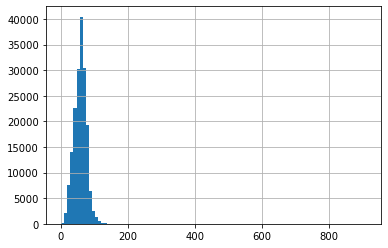

In [49]:
data['len'].hist(bins = 100)

In [50]:
data['token_len'] = data['headline'].apply(lambda x: len(x.split()))

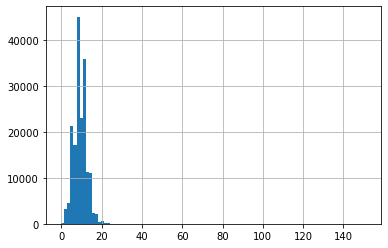

In [51]:
data['token_len'].hist(bins = 100)

In [52]:
### Some very long titles, will put in a max-len.

In [53]:
label_len_group = data.groupby(['token_len', 'is_sarcastic']).size().reset_index()
label_len_group

,token_len,is_sarcastic,0
0,0,0,1
1,1,0,57
2,1,1,8
3,2,0,563
4,2,1,105
...,...,...,...
69,44,1,1
70,56,1,1
71,57,1,1
72,71,1,1


In [54]:
label_len_group.iloc[35:45]

,token_len,is_sarcastic,0
35,18,0,280
36,18,1,536
37,19,0,107
38,19,1,377
39,20,0,66
40,20,1,261
41,21,0,26
42,21,1,163
43,22,0,8
44,22,1,113


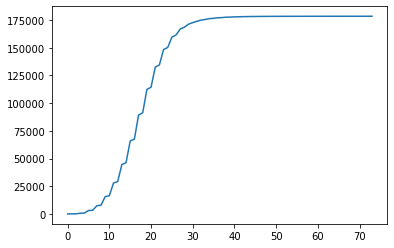

In [55]:
plt.plot(np.cumsum(label_len_group[0].values))

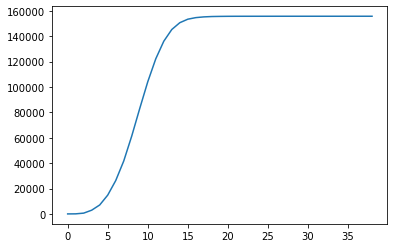

In [56]:
plt.plot(label_len_group.loc[label_len_group['is_sarcastic']==0]['token_len'].values, np.cumsum(label_len_group.loc[label_len_group['is_sarcastic']==0][0].values))

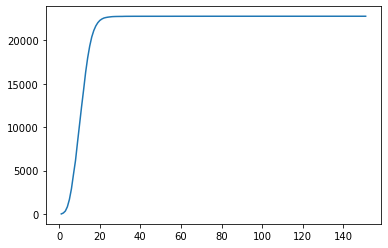

In [57]:
plt.plot(label_len_group.loc[label_len_group['is_sarcastic']==1]['token_len'].values,np.cumsum(label_len_group.loc[label_len_group['is_sarcastic']==1][0].values))

In [58]:
label_len_group.loc[label_len_group['is_sarcastic']==0]

,token_len,is_sarcastic,0
0,0,0,1
1,1,0,57
3,2,0,563
5,3,0,2319
7,4,0,4110
9,5,0,7745
11,6,0,11466
13,7,0,15409
15,8,0,19677
17,9,0,21729


In [59]:
max_len = 30

### Source Specific Language

In [60]:
from sklearn import feature_extraction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [61]:
clean = pd.read_csv('../data/combined_clean.csv', sep = "|")
clean['token_len'] = clean['clean'].apply(lambda x: len(str(x).split()))
clean = clean.loc[clean['token_len'] > 0]
clean = clean.loc[clean['token_len'] <= 41]
clean.reset_index(inplace = True, drop = True)

In [62]:
clean.sort_values(by = 'token_len')

,source,year,clean,is_sarcastic,token_len
143645,atlantic,2017,NaN,0,1
156382,atlantic,2016,quoted,0,1
153795,atlantic,2016,quoted,0,1
153297,atlantic,2016,quoted,0,1
157073,atlantic,2016,quoted,0,1
...,...,...,...,...,...
179666,Hard Times,2020,aspiring symphony musician seeks 20 violinists...,1,34
162911,onion,2018,one for the road seaworld has realized people ...,1,35
166636,onion,2019,thomas jefferson the tree of liberty must be r...,1,37
168065,onion,2020,hawks celtics nets hornets bulls cavs mavs nug...,1,37


In [63]:
clean.sample(n = 5)

,source,year,clean,is_sarcastic,token_len
28874,Huffington Post,2016,debris found in mozambique almost certainly fr...,0,11
158947,onion,2016,oxford apologizes for sexist definition,1,5
162773,onion,2018,man with backedup shower drain enjoys luxuriou...,1,9
128917,atlantic,2019,scenes from the 2019 pan american games,0,7
7178,Huffington Post,2016,these beautiful photographs explore the wide s...,0,10


In [64]:
cv = feature_extraction.text.CountVectorizer(lowercase = True,
                                             strip_accents = 'ascii',
                                             ngram_range=(1,3),
                                             stop_words="english",
                                             max_df = .8,
                                             min_df = 10, binary = True)

In [65]:
train = clean.loc[clean['year'] != 2020]
test = clean.loc[clean['year'] == 2020]

X_train = train['clean'].values.astype('U')

In [66]:
print("Fitting Count Vectorizer")
cv.fit(X_train)
X_train_cv = cv.transform(X_train)

Fitting Count Vectorizer


In [67]:
train['source'].unique()

array(['Huffington Post', 'ABC Australia', 'npr', 'guardian',
       'nottheonion', 'atlantic', 'onion', 'reductress',
       'national report', 'Hard Times'], dtype=object)

In [68]:
source_specific = []
for source in train['source'].unique():
    Y_train = train['source'].apply(lambda x: 1 if x == source else 0)
    lr_cv = LogisticRegression(max_iter = 100)
    lr_cv.fit(X_train_cv, Y_train)
    
    vocab = cv.get_feature_names()
    coef_dicts = []
    for i, coef_ in enumerate(list(lr_cv.coef_[0,:])):
        coef_dict = {'word': vocab[i], 'coef': coef_}
        coef_dicts.append(coef_dict)
    coef_pd = pd.DataFrame(coef_dicts)
    source_dict = {'source': source, 'phrases': coef_pd.sort_values('coef', ascending=False)['word'][:50].values}
    source_specific.append(source_dict)

/Users/valeriehuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/valeriehuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Use

In [69]:
source_specific

[{'source': 'Huffington Post',
  'phrases': array(['huffpollster', 'huffpost', 'morning email', 'bachelor',
         'hilarious', 'maher', 'hilariously', 'antilgbtq', 'chipotle',
         'music video', 'tweeters', 'spoof', 'gps guide', 'suicide squad',
         'nsfw', 'nyc', 'fk', 'adele', 'snl', 'behold', 'americans say',
         'daily meditation', 'funniest', 'looney', 'mylan', 'black friday',
         'colbert', '2014', 'rep', 'felony', 'sweetest', 'gays', 'recipes',
         'new music', 'new video', 'clip', 'lgbtq', 'premiere',
         'ridiculously', 'scotus', 'homophobia', 'roundup', 'wearable',
         'adorably', 'bisexual', 'nightmares', 'conan', 'melt', 'feds',
         'ellen'], dtype=object)},
 {'source': 'ABC Australia',
  'phrases': array(['adelaide', 'wa', 'queensland', 'nsw', 'tasmania', 'canberra',
         'melbourne', 'png', 'planet america', 'perth', 'sa', 'brisbane',
         'talking pictures', 'aboriginal', 'qld', 'anti', 'nt', 'sydney',
         'tasmania

Huffington Post


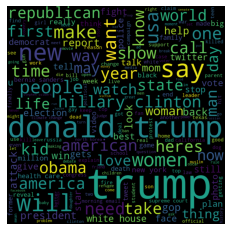

ABC Australia


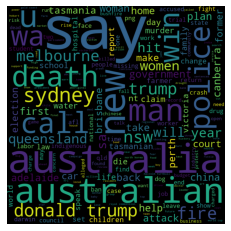

npr


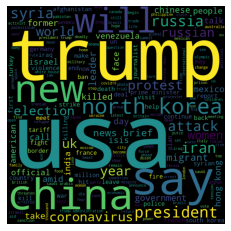

guardian


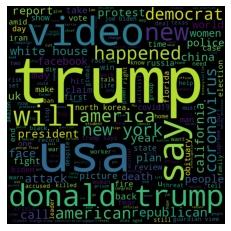

nottheonion


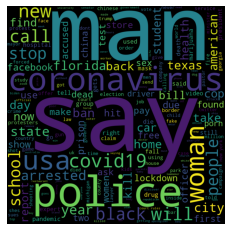

atlantic


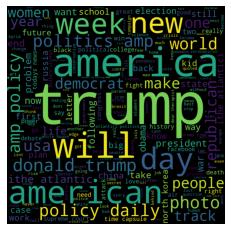

onion


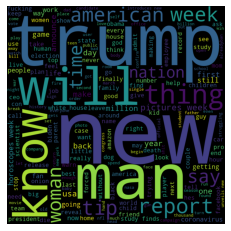

reductress


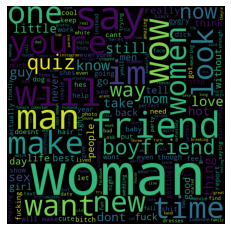

national report


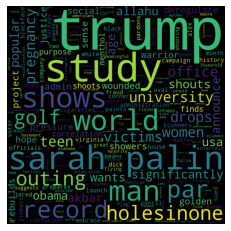

Hard Times


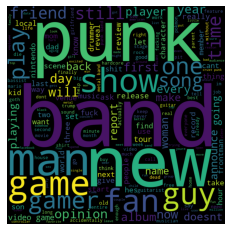

In [70]:
for source in clean['source'].unique():
    source_text = clean.loc[clean['source'] == source]['clean'].astype('U')

    wc = wordcloud.WordCloud(width = 800, height = 800).generate(" ".join(source_text))
    plt.imshow(wc)
    plt.axis("off")
    print(source)
    plt.show()